# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [5]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

#from plotly import plotly
#import plotly.offline as offline
#import plotly.graph_objs as go
#offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [6]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [7]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [8]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)
print(project_data.shape)

(109248, 17)


In [9]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


In [10]:
#adding price of project to the project_data dataset
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)
print(price_data.shape)
print(price_data.columns.values)

(260115, 3)
['id' 'price' 'quantity']


In [11]:
project_data = pd.merge(project_data, price_data, on='id', how='left')

## 1.2 preprocessing of `project_subject_categories`

In [12]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [13]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [14]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [15]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,price,quantity,clean_categories,clean_subcategories,essay
0,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:36,Grades PreK-2,Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,Each month I try to do several science or STEM...,It is challenging to develop high quality scie...,My students need STEM kits to learn critical s...,53,1,725.05,4,Math_Science,AppliedSciences Health_LifeScience,I have been fortunate enough to use the Fairy ...
1,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms.,UT,2016-04-27 00:31:25,Grades 3-5,Sensory Tools for Focus,Imagine being 8-9 years old. You're in your th...,"Most of my students have autism, anxiety, anot...",It is tough to do more than one thing at a tim...,When my students are able to calm themselves d...,My students need Boogie Boards for quiet senso...,4,1,213.03,8,SpecialNeeds,SpecialNeeds,Imagine being 8-9 years old. You're in your th...


In [16]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [17]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

I have been fortunate enough to use the Fairy Tale STEM kits in my classroom as well as the STEM journals, which my students really enjoyed.  I would love to implement more of the Lakeshore STEM kits in my classroom for the next school year as they provide excellent and engaging STEM lessons.My students come from a variety of backgrounds, including language and socioeconomic status.  Many of them don't have a lot of experience in science and engineering and these kits give me the materials to provide these exciting opportunities for my students.Each month I try to do several science or STEM/STEAM projects.  I would use the kits and robot to help guide my science instruction in engaging and meaningful ways.  I can adapt the kits to my current language arts pacing guide where we already teach some of the material in the kits like tall tales (Paul Bunyan) or Johnny Appleseed.  The following units will be taught in the next school year where I will implement these kits: magnets, motion, si

In [18]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [19]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

\"A person is a person, no matter how small.\" (Dr.Seuss) I teach the smallest students with the biggest enthusiasm for learning. My students learn in many different ways using all of our senses and multiple intelligences. I use a wide range of techniques to help all my students succeed. \r\nStudents in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures, including Native Americans.\r\nOur school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom. Kindergarteners in my class love to work with hands-on materials and have many different opportunities to practice a skill before it is mastered. Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum.Montana is the perfect place to learn about agriculture and nutrition. My students love to role play in our pretend kitchen in the ear

In [20]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

 A person is a person, no matter how small.  (Dr.Seuss) I teach the smallest students with the biggest enthusiasm for learning. My students learn in many different ways using all of our senses and multiple intelligences. I use a wide range of techniques to help all my students succeed.   Students in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures, including Native Americans.  Our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom. Kindergarteners in my class love to work with hands-on materials and have many different opportunities to practice a skill before it is mastered. Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum.Montana is the perfect place to learn about agriculture and nutrition. My students love to role play in our pretend kitchen in the early chi

In [21]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

 A person is a person no matter how small Dr Seuss I teach the smallest students with the biggest enthusiasm for learning My students learn in many different ways using all of our senses and multiple intelligences I use a wide range of techniques to help all my students succeed Students in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures including Native Americans Our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom Kindergarteners in my class love to work with hands on materials and have many different opportunities to practice a skill before it is mastered Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum Montana is the perfect place to learn about agriculture and nutrition My students love to role play in our pretend kitchen in the early childhood classroom

In [22]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [23]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████| 109248/109248 [01:42<00:00, 1065.28it/s]


In [24]:
project_data['clean_essay'] = preprocessed_essays
project_data.drop(['essay'], axis=1, inplace=True)
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,price,quantity,clean_categories,clean_subcategories,clean_essay
0,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:36,Grades PreK-2,Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,Each month I try to do several science or STEM...,It is challenging to develop high quality scie...,My students need STEM kits to learn critical s...,53,1,725.05,4,Math_Science,AppliedSciences Health_LifeScience,i fortunate enough use fairy tale stem kits cl...
1,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms.,UT,2016-04-27 00:31:25,Grades 3-5,Sensory Tools for Focus,Imagine being 8-9 years old. You're in your th...,"Most of my students have autism, anxiety, anot...",It is tough to do more than one thing at a tim...,When my students are able to calm themselves d...,My students need Boogie Boards for quiet senso...,4,1,213.03,8,SpecialNeeds,SpecialNeeds,imagine 8 9 years old you third grade classroo...


In [25]:
# after preprocesing
preprocessed_essays[20000]

'a person person no matter small dr seuss i teach smallest students biggest enthusiasm learning my students learn many different ways using senses multiple intelligences i use wide range techniques help students succeed students class come variety different backgrounds makes wonderful sharing experiences cultures including native americans our school caring community successful learners seen collaborative student project based learning classroom kindergarteners class love work hands materials many different opportunities practice skill mastered having social skills work cooperatively friends crucial aspect kindergarten curriculum montana perfect place learn agriculture nutrition my students love role play pretend kitchen early childhood classroom i several kids ask can try cooking real food i take idea create common core cooking lessons learn important math writing concepts cooking delicious healthy food snack time my students grounded appreciation work went making food knowledge ingre

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [26]:
# similarly you can preprocess the titles also
from tqdm import tqdm
preprocessed_title= []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_title.append(sent.lower().strip())
    
    

100%|██████████| 109248/109248 [00:04<00:00, 25252.21it/s]


In [27]:
project_data['clean_title'] = preprocessed_title
project_data.drop(['project_title'], axis=1, inplace=True)
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,price,quantity,clean_categories,clean_subcategories,clean_essay,clean_title
0,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:36,Grades PreK-2,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,Each month I try to do several science or STEM...,It is challenging to develop high quality scie...,My students need STEM kits to learn critical s...,53,1,725.05,4,Math_Science,AppliedSciences Health_LifeScience,i fortunate enough use fairy tale stem kits cl...,engineering steam primary classroom
1,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms.,UT,2016-04-27 00:31:25,Grades 3-5,Imagine being 8-9 years old. You're in your th...,"Most of my students have autism, anxiety, anot...",It is tough to do more than one thing at a tim...,When my students are able to calm themselves d...,My students need Boogie Boards for quiet senso...,4,1,213.03,8,SpecialNeeds,SpecialNeeds,imagine 8 9 years old you third grade classroo...,sensory tools focus


In [28]:
# similarly you can preprocess the titles also
from tqdm import tqdm
preprocessed_grade = []
# tqdm is for printing the status bar
for sent in tqdm(project_data['project_grade_category'].values):
    sent = sent.replace('-', '_')
    sent = sent.replace(' ', '_')
    
    
    preprocessed_grade.append(sent)
    
    

100%|██████████| 109248/109248 [00:00<00:00, 657984.84it/s]


In [29]:
project_data['clean_grades'] = preprocessed_grade
project_data.drop(['project_grade_category'], axis=1, inplace=True)
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,price,quantity,clean_categories,clean_subcategories,clean_essay,clean_title,clean_grades
0,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:36,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,Each month I try to do several science or STEM...,It is challenging to develop high quality scie...,My students need STEM kits to learn critical s...,53,1,725.05,4,Math_Science,AppliedSciences Health_LifeScience,i fortunate enough use fairy tale stem kits cl...,engineering steam primary classroom,Grades_PreK_2
1,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms.,UT,2016-04-27 00:31:25,Imagine being 8-9 years old. You're in your th...,"Most of my students have autism, anxiety, anot...",It is tough to do more than one thing at a tim...,When my students are able to calm themselves d...,My students need Boogie Boards for quiet senso...,4,1,213.03,8,SpecialNeeds,SpecialNeeds,imagine 8 9 years old you third grade classroo...,sensory tools focus,Grades_3_5


In [30]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [31]:
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/namitagarwal/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [32]:
#citation: https://www.programcreek.com/python/example/100005/nltk.sentiment.vader.SentimentIntensityAnalyzer

sentiments=[]
sid = SentimentIntensityAnalyzer()

for essay in project_data['clean_essay']:
    sentiment = sid.polarity_scores(essay)
        
    for k in sorted(sentiment):
        sentiments.append([sentiment['neg'], sentiment['pos'],
                           sentiment['neu'], sentiment['compound']])

In [33]:
#adding all the four sentiment scores to our dataframe
project_data[['neg', 'pos', 'neu', 'compound']] = pd.DataFrame(sentiments)

In [34]:
#finding #words in title
count=0
count_lst_title=[]
for word in preprocessed_title:
    count+=1
    count_lst_title.append(count)

project_data[['#words_in_title']] = pd.DataFrame(count_lst_title)

In [35]:
#finding #words in essay
count=0
count_lst_essay=[]
for word in preprocessed_essays:
    count+=1
    count_lst_essay.append(count)

project_data[['#words_in_essay']] = pd.DataFrame(count_lst_essay)

In [36]:
project_data.shape

(109248, 26)

## 1.5 Preparing data for models

In [38]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'price', 'quantity', 'clean_categories', 'clean_subcategories',
       'clean_essay', 'clean_title', 'clean_grades', 'neg', 'pos', 'neu',
       'compound', '#words_in_title', '#words_in_essay'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

In [253]:
project_data.shape

(109248, 25)

In [254]:
#setting the order of the columns 
project_data= project_data[['id','teacher_id','teacher_prefix','school_state','Date','clean_grades','clean_categories','clean_subcategories','clean_title','project_essay_1','project_essay_2','project_essay_3','project_essay_4','project_resource_summary','teacher_number_of_previously_posted_projects','price','quantity','clean_essay','neg', 'pos', 'neu', 'compound', '#words_in_title',
       '#words_in_essay','project_is_approved']]

In [255]:
#splitting the dataset into the source variables (independant variables) and the target variable (dependant variable)
# considering 50k points due to memory issues

Y=np.array(project_data.iloc[:50000, 24])#.reshape(-1,1) #stores 'project is approved' column
X=project_data.iloc[:50000, 0:24] 

In [256]:
print(X.shape)
print(Y.shape)

(50000, 24)
(50000,)


<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [257]:
#price

from sklearn.preprocessing import Normalizer

price_scalar = Normalizer()
price_scalar.fit(X['price'].values.reshape(1,-1)) # finding the mean and standard deviation of this data

# Now standardize the data with above maen and variance.
price_standardized_train = price_scalar.transform(X['price'].values.reshape(1, -1)).reshape(-1,1)
#price_standardized_cv = price_scalar.transform(x_cv['price'].values.reshape(1, -1)).reshape(-1,1)
#price_standardized_test = price_scalar.transform(x_test['price'].values.reshape(1, -1)).reshape(-1,1)

In [258]:
#teacher_number_of_previously_posted_projects

teacher_scalar = Normalizer()
teacher_scalar.fit(X['teacher_number_of_previously_posted_projects'].values.reshape(1, -1)) # finding the mean and standard deviation of this data

# Now standardize the data with above maen and variance.
teacher_number_of_previously_posted_projects_standardized_train = teacher_scalar.transform(X['price'].values.reshape(1, -1)).reshape(-1,1)
#teacher_number_of_previously_posted_projects_standardized_cv = teacher_scalar.transform(x_cv['price'].values.reshape(1, -1)).reshape(-1,1)
#teacher_number_of_previously_posted_projects_standardized_test = teacher_scalar.transform(x_test['price'].values.reshape(1, -1)).reshape(-1,1)

In [259]:
#quantity

quantity_scalar = Normalizer()
quantity_scalar.fit(X['quantity'].values.reshape(1,-1)) # finding the mean and standard deviation of this data

# Now standardize the data with above maen and variance.
quantity_train = quantity_scalar.transform(X['quantity'].values.reshape(1,-1)).reshape(-1,1)
#quantity_cv = quantity_scalar.transform(x_cv['quantity'].values.reshape(1, -1)).reshape(-1,1)
#quantity_test = quantity_scalar.transform(x_test['quantity'].values.reshape(1, -1)).reshape(-1,1)

In [260]:
#words_in_essay

essay_words_scalar = Normalizer()
essay_words_scalar.fit(X['#words_in_essay'].values.reshape(1,-1)) # finding the mean and standard deviation of this data

# Now standardize the data with above maen and variance.
essay_words_train = essay_words_scalar.transform(X['#words_in_essay'].values.reshape(1,-1)).reshape(-1,1)
#essay_words_cv = essay_words_scalar.transform(x_cv['#words_in_essay'].values.reshape(1, -1)).reshape(-1,1)
#essay_words_test = essay_words_scalar.transform(x_test['#words_in_essay'].values.reshape(1, -1)).reshape(-1,1)

In [261]:
#words_in_title

title_words_scalar = Normalizer()
title_words_scalar.fit(X['#words_in_title'].values.reshape(1,-1)) # finding the mean and standard deviation of this data

# Now standardize the data with above maen and variance.
title_words_train = title_words_scalar.transform(X['#words_in_title'].values.reshape(1, -1)).reshape(-1,1)
#title_words_cv = title_words_scalar.transform(x_cv['#words_in_title'].values.reshape(1, -1)).reshape(-1,1)
#title_words_test = title_words_scalar.transform(x_test['#words_in_title'].values.reshape(1, -1)).reshape(-1,1)

In [262]:
#neg
scalar = Normalizer()
scalar.fit(X['neg'].values.reshape(1,-1)) # finding the mean and standard deviation of this data

# Now standardize the data with above maen and variance.
neg_train = scalar.transform(X['neg'].values.reshape(1,-1)).reshape(-1,1)
#neg_cv = scalar.transform(x_cv['neg'].values.reshape(1, -1)).reshape(-1,1)
#neg_test = scalar.transform(x_test['neg'].values.reshape(1, -1)).reshape(-1,1)

In [263]:
#pos
scalar = Normalizer()
scalar.fit(X['pos'].values.reshape(1, -1)) # finding the mean and standard deviation of this data

# Now standardize the data with above maen and variance.
pos_train = scalar.transform(X['pos'].values.reshape(1, -1)).reshape(-1,1)
#pos_cv = scalar.transform(x_cv['pos'].values.reshape(1, -1)).reshape(-1,1)
#pos_test = scalar.transform(x_test['pos'].values.reshape(1, -1)).reshape(-1,1)

In [264]:
#neu
scalar = Normalizer()
scalar.fit(X['neu'].values.reshape(1, -1)) # finding the mean and standard deviation of this data

# Now standardize the data with above maen and variance.
neu_train = scalar.transform(X['neu'].values.reshape(1, -1)).reshape(-1,1)
#neu_cv = scalar.transform(x_cv['neu'].values.reshape(1, -1)).reshape(-1,1)
#neu_test = scalar.transform(x_test['neu'].values.reshape(1, -1)).reshape(-1,1)

In [265]:
#compound
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
scalar.fit(X['compound'].values.reshape(1, -1)) # finding the mean and standard deviation of this data

# Now standardize the data with above maen and variance.
compound_train = scalar.transform(X['compound'].values.reshape(1, -1)).reshape(-1,1)
#compound_cv = scalar.transform(x_cv['compound'].values.reshape(1, -1)).reshape(-1,1)
#compound_test = scalar.transform(x_test['compound'].values.reshape(1, -1)).reshape(-1,1)

In [266]:
#####vectorising categorical features

# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(X['clean_categories'].values)
print(vectorizer.get_feature_names())


categories_one_hot_train = vectorizer.transform(X['clean_categories'].values)
#categories_one_hot_cv = vectorizer.transform(x_cv['clean_categories'].values)
#categories_one_hot_test = vectorizer.transform(x_test['clean_categories'].values)

print("Shape of matrix after one hot encodig ",categories_one_hot_train.shape)
#print("Shape of matrix after one hot encodig ",categories_one_hot_cv.shape)
#print("Shape of matrix after one hot encodig ",categories_one_hot_test.shape)

['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']
Shape of matrix after one hot encodig  (50000, 9)


In [267]:
# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer()
vectorizer.fit(X['clean_subcategories'].values)
print(vectorizer.get_feature_names())


sub_categories_one_hot_train = vectorizer.transform(X['clean_subcategories'].values)
#sub_categories_one_hot_cv = vectorizer.transform(x_cv['clean_subcategories'].values)
#sub_categories_one_hot_test = vectorizer.transform(x_test['clean_subcategories'].values)

print("Shape of matrix after one hot encodig ",sub_categories_one_hot_train.shape)
#print("Shape of matrix after one hot encodig ",sub_categories_one_hot_cv.shape)
#print("Shape of matrix after one hot encodig ",sub_categories_one_hot_test.shape)

['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']
Shape of matrix after one hot encodig  (50000, 30)


In [268]:
#school state
vectorizer = CountVectorizer()
vectorizer.fit(X['school_state'])
print(vectorizer.get_feature_names())


school_one_hot_train = vectorizer.transform(X['school_state'].values)
#school_one_hot_cv = vectorizer.transform(x_cv['school_state'].values)
#school_one_hot_test = vectorizer.transform(x_test['school_state'].values)


print("Shape of matrix after one hot encodig ",school_one_hot_train.shape)
#print("Shape of matrix after one hot encodig ",school_one_hot_cv.shape)
#print("Shape of matrix after one hot encodig ",school_one_hot_test.shape)

['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']
Shape of matrix after one hot encodig  (50000, 51)


In [269]:
#teacher_prefix 
vectorizer = CountVectorizer()
vectorizer.fit(X['teacher_prefix'].dropna().values)
print(vectorizer.get_feature_names())


teacher_prefix_one_hot_train = vectorizer.transform(X['teacher_prefix'].dropna().values)
#teacher_prefix_one_hot_cv = vectorizer.transform(x_cv['teacher_prefix'].dropna().values)
#teacher_prefix_one_hot_test = vectorizer.transform(x_test['teacher_prefix'].dropna().values)

print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot_train.shape)
#print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot_cv.shape)
#print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot_test.shape)

['dr', 'mr', 'mrs', 'ms', 'teacher']
Shape of matrix after one hot encodig  (49998, 5)


In [270]:
#project_grade_category 
vectorizer = CountVectorizer()
vectorizer.fit(X['clean_grades'].values)
print(vectorizer.get_feature_names())


grade_one_hot_train = vectorizer.transform(X['clean_grades'].values)
#grade_one_hot_cv = vectorizer.transform(x_cv['clean_grades'].values)
#grade_one_hot_test = vectorizer.transform(x_test['clean_grades'].values)


print("Shape of matrix after one hot encodig ",grade_one_hot_train.shape)
#print("Shape of matrix after one hot encodig ",grade_one_hot_cv.shape)
#print("Shape of matrix after one hot encodig ",grade_one_hot_test.shape)

['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']
Shape of matrix after one hot encodig  (50000, 4)


In [60]:
#BOW essay
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,2), max_features=5000)
vectorizer.fit(X['clean_essay']) #fit

essay_bow_train = vectorizer.transform(X['clean_essay']) #transform
#essay_bow_cv = vectorizer.transform(x_cv['clean_essay']) #transform
#essay_bow_test = vectorizer.transform(x_test['clean_essay']) #transform


print("Shape of matrix after one hot encodig ",essay_bow_train.shape)
#print("Shape of matrix after one hot encodig ",essay_bow_cv.shape)
#print("Shape of matrix after one hot encodig ",essay_bow_test.shape)

Shape of matrix after one hot encodig  (50000, 5000)


In [61]:
#bow title
vectorizer = CountVectorizer(min_df=10)
vectorizer.fit(X['clean_title']) #fit

title_bow_train = vectorizer.transform(X['clean_title']) #transform
#title_bow_cv = vectorizer.transform(x_cv['clean_title']) #transform
#title_bow_test = vectorizer.transform(x_test['clean_title']) #transform


print("Shape of matrix after one hot encodig ",title_bow_train.shape)
#print("Shape of matrix after one hot encodig ",title_bow_cv.shape)
#print("Shape of matrix after one hot encodig ",title_bow_test.shape)

Shape of matrix after one hot encodig  (50000, 1960)


In [274]:
print(categories_one_hot_train.shape) 
print(sub_categories_one_hot_train.shape)
print(school_one_hot_train.shape) 
print(teacher_prefix_one_hot_train.shape) 
print(grade_one_hot_train.shape)
print(price_standardized_train.shape) 
print(teacher_number_of_previously_posted_projects_standardized_train.shape) 
print(quantity_train.shape)
print(neg_train.shape)
print(pos_train.shape)
print(neu_train.shape)
print(compound_train.shape)
print(essay_words_train.shape)
print(title_words_train.shape)
print(essay_bow_train.shape)
print(title_bow_train.shape)


(50000, 9)
(50000, 30)
(50000, 51)
(49998, 5)
(50000, 4)
(50000, 1)
(50000, 1)
(50000, 1)
(50000, 1)
(50000, 1)
(50000, 1)
(50000, 1)
(50000, 1)
(50000, 1)
(49998, 5000)
(49998, 1960)
(50000, 300)
(50000, 300)


In [275]:
##########TRAIN
categories_one_hot_train= categories_one_hot_train[:49998, :]
sub_categories_one_hot_train = sub_categories_one_hot_train[:49998, :]
school_one_hot_train = school_one_hot_train[:49998, :]
teacher_prefix_one_hot_train = teacher_prefix_one_hot_train[:49998, :]
grade_one_hot_train = grade_one_hot_train[:49998, :]

price_standardized_train = price_standardized_train[:49998, :]
teacher_number_of_previously_posted_projects_standardized_train= teacher_number_of_previously_posted_projects_standardized_train[:49998, :]
quantity_train =quantity_train[:49998, :]
neg_train =neg_train[:49998, :]
pos_train =pos_train[:49998, :]
neu_train =neu_train[:49998, :]
compound_train = compound_train[:49998, :]
essay_words_train = essay_words_train[:49998, :]
title_words_train =title_words_train[:49998, :]

essay_bow_train = essay_bow_train[:49998, :]
title_bow_train = title_bow_train[:49998, :]


<H1> Combining Data

In [200]:
#preparing data
from scipy.sparse import hstack

In [282]:
x1_train = hstack((categories_one_hot_train, sub_categories_one_hot_train, school_one_hot_train,teacher_prefix_one_hot_train,grade_one_hot_train,price_standardized_train,teacher_number_of_previously_posted_projects_standardized_train,quantity_train,neg_train, pos_train,  neu_train, compound_train,essay_words_train,title_words_train , essay_bow_train,title_bow_train)) 
y1_train = Y[:49998]

print(x1_train.shape)
print(y1_train.shape)

(49998, 7068)
(49998,)


In [283]:
x1_train

<49998x7068 sparse matrix of type '<class 'numpy.float64'>'
	with 7384040 stored elements in COOrdinate format>

<h1> Dimension Reduction to 5000 features

In [284]:
from sklearn.feature_selection import SelectKBest, chi2

In [285]:
clf = SelectKBest(chi2, k=5000)
X_new = clf.fit_transform(x1_train, y1_train)
X_new.shape 

(49998, 5000)

In [286]:
X_new

<49998x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 5896445 stored elements in Compressed Sparse Row format>

<h1>2. Clustering </h1>

In [369]:
#choosing 5000 points sample
x = X_new[:5000]
x.shape

(5000, 5000)

<h2>2.5 Apply Kmeans</h2>

In [374]:
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from datetime import datetime

In [375]:
start = datetime.now()
k = [2,4,7,9,11,13]
lst=[]
for i in tqdm(k):
    neigh = KMeans(n_clusters = i ) 
    neigh.fit(x) 
    lst.append(neigh.inertia_) 
    
print("time taken:",datetime.now() - start)



  0%|          | 0/6 [00:00<?, ?it/s]

 17%|█▋        | 1/6 [02:12<11:00, 132.02s/it]

 33%|███▎      | 2/6 [06:13<10:59, 164.78s/it]

 50%|█████     | 3/6 [11:31<10:32, 210.93s/it]

 67%|██████▋   | 4/6 [17:46<08:39, 259.93s/it]

 83%|████████▎ | 5/6 [22:22<04:24, 264.75s/it]

100%|██████████| 6/6 [27:56<00:00, 279.46s/it]

time taken: 0:27:56.773488


In [376]:
lst

[1164138.0617181922,
 1128300.470544917,
 1104802.2551401963,
 1094606.7906085677,
 1084814.1377963333,
 1078997.8183454066]

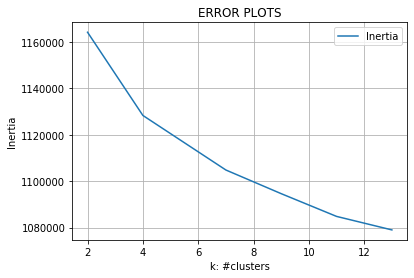

In [377]:
plt.plot(k, lst, label='Inertia')

plt.legend() 
plt.xlabel("k: #clusters") 
plt.ylabel("Inertia") 
plt.title("ERROR PLOTS") 
plt.grid()
plt.show()

In [378]:
neigh = KMeans(n_clusters = 4)
neigh.fit(x) 
y_pred = neigh.predict(x)

In [379]:
print(neigh.labels_) 

[1 3 3 ... 1 3 1]


In [380]:
y_pred.shape

(5000,)

In [382]:
#N=100
x_ = np.random.rand(5000)
x_.shape

(5000,)

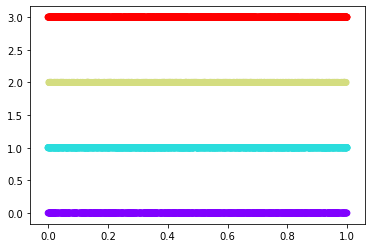

In [383]:
plt.scatter(x_,y_pred, c=neigh.labels_, cmap='rainbow')

<h1> Looking at each cluster

<h4> Cluster 0

In [388]:
index = np.where(y_pred==0)[0] #stores the index of all the points belonging to cluster 2

In [389]:
# text stores all the essay text present in these indices
text =""
for i in index:
    text += X['clean_essay'][i]

In [390]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [391]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

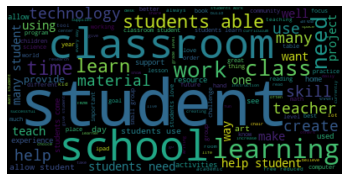

In [392]:
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Words related to education can be found mostly - student, clasroom,learning, technology,school

<h4> Cluster 1

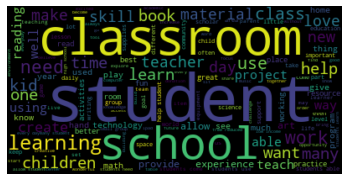

In [393]:
index = np.where(y_pred==1)[0] #stores the index of all the points belonging to cluster 2

# text stores all the essay text present in these indices
text =""
for i in index:
    text += X['clean_essay'][i]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

words like help, use, need, love, able, want can be seen along with student, classroom,school

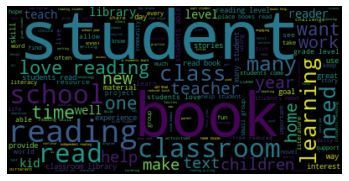

In [394]:
index = np.where(y_pred==2)[0] #stores the index of all the points belonging to cluster 2

# text stores all the essay text present in these indices
text =""
for i in index:
    text += X['clean_essay'][i]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Words like book, time, home, library, reader, teach - so mostly book related essays were clustered here

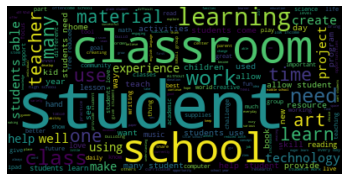

In [395]:
index = np.where(y_pred==3)[0] #stores the index of all the points belonging to cluster 2

# text stores all the essay text present in these indices
text =""
for i in index:
    text += X['clean_essay'][i]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

words like art,create, material,using,make,experience are present along with classroom,student and school. It looks like craft related essays were clustered as one

<h2>2.6 Apply AgglomerativeClustering</h2>

In [517]:
#choosing 5000 points sample
x = X_new[:5000]
x.shape

(5000, 5000)

In [499]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

In [500]:
linked = linkage(x.transpose().toarray(), method='ward')

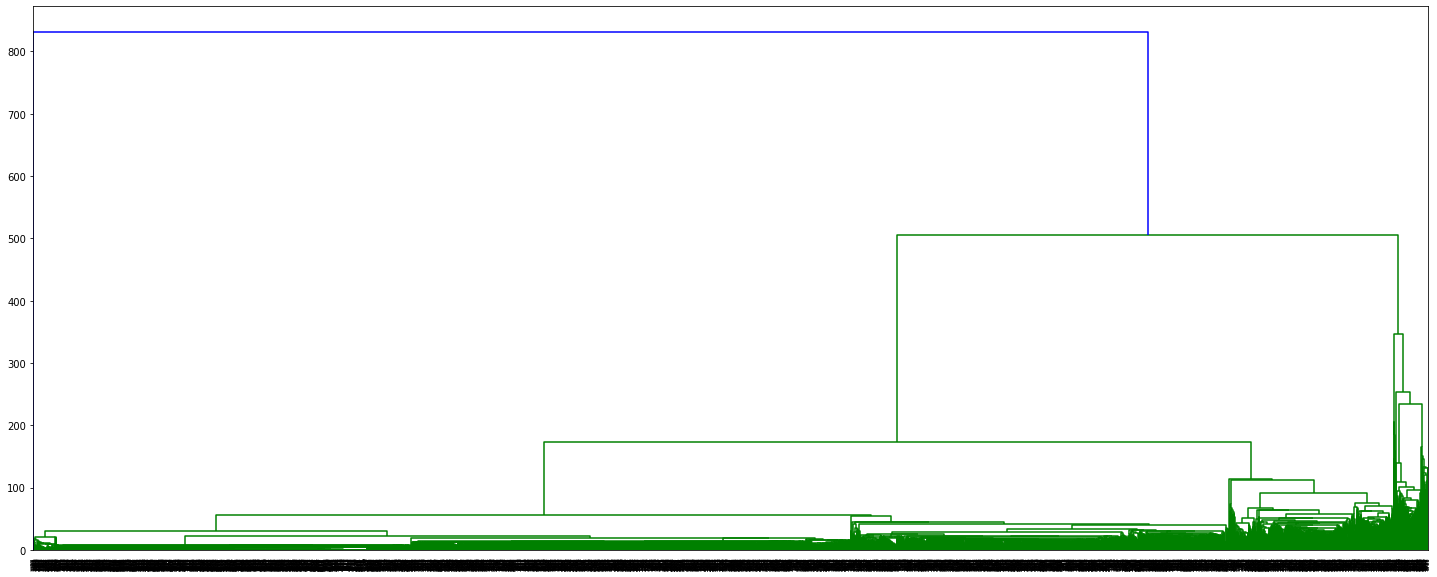

In [501]:
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(linked, distance_sort='descending',
            show_leaf_counts=True)
plt.show()

In [502]:
#no. of clusters = 3

In [503]:
from sklearn.cluster import AgglomerativeClustering

In [515]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
#linkage = ward----minimizes difference between clusters

In [518]:
y_pred = cluster.fit_predict(x.toarray())
y_pred

array([3, 2, 3, ..., 3, 3, 3])

In [519]:
print(cluster.labels_)

[3 2 3 ... 3 3 3]


In [520]:
x = np.random.rand(5000)

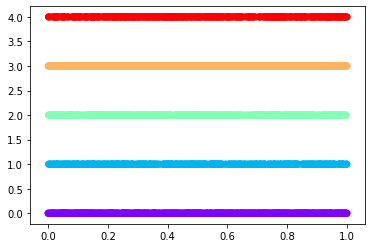

In [521]:
plt.scatter(x,y_pred, c=cluster.labels_, cmap='rainbow')

<h4> Cluster 0

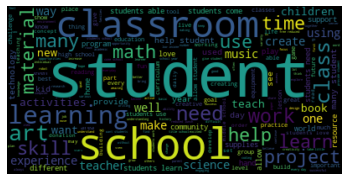

In [522]:
index = np.where(y_pred==0)[0] #stores the index of all the points belonging to cluster 2

# text stores all the essay text present in these indices
text =""
for i in index:
    text += X['clean_essay'][i]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Cluster related to art, material,etc

<h4> Cluster 1

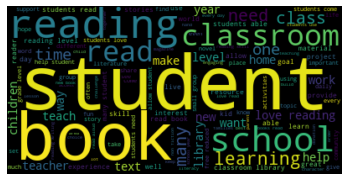

In [523]:
index = np.where(y_pred==1)[0] #stores the index of all the points belonging to cluster 2

# text stores all the essay text present in these indices
text =""
for i in index:
    text += X['clean_essay'][i]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

cluster inclusing essay that mostly involved reading and books

<h4> Cluster 2

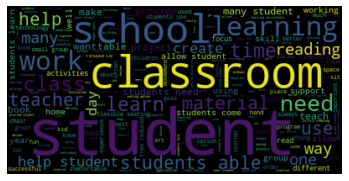

In [524]:
index = np.where(y_pred==2)[0] #stores the index of all the points belonging to cluster 2

# text stores all the essay text present in these indices
text =""
for i in index:
    text += X['clean_essay'][i]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Cluster invloving work,help,material for students

<h4> Cluster 3

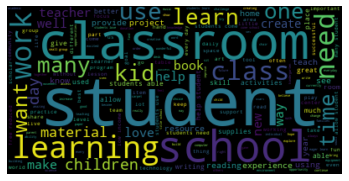

In [525]:
index = np.where(y_pred==3)[0] #stores the index of all the points belonging to cluster 2

# text stores all the essay text present in these indices
text =""
for i in index:
    text += X['clean_essay'][i]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

cluster involving learning

<h4> Cluster 4

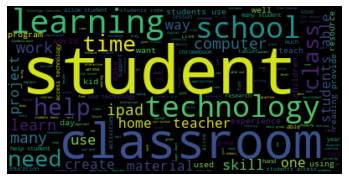

In [526]:
index = np.where(y_pred==4)[0] #stores the index of all the points belonging to cluster 2

# text stores all the essay text present in these indices
text =""
for i in index:
    text += X['clean_essay'][i]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

cluster involvong technology and projects

<h2>2.7 Apply DBSCAN</h2>

In [487]:
#In DBSCAN we do no need to explicitly state the no. of clusters. It computes it itself.
#choosing 5000 points sample
x = X_new[:5000]
x.shape 

(5000, 5000)

In [488]:
x_ = x.toarray()
x_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [489]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

time taken: 0:04:08.569143


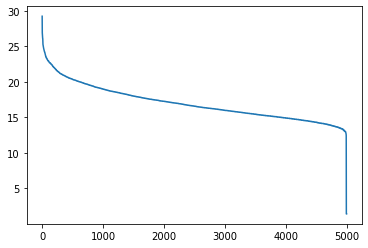

In [491]:
start = datetime.now()
ns = 5
nbrs = NearestNeighbors(n_neighbors=ns).fit(x_)
distances, indices = nbrs.kneighbors(x_)
distanceDec = sorted(distances[:,ns-1], reverse=True)
plt.plot(indices[:,0], distanceDec)
print("time taken:", datetime.now()- start)

In [492]:
#choosing eps=22 from the above graph
m = DBSCAN(eps=22, min_samples=5)
y_pred = m.fit_predict(x_) 
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [493]:
clusters = m.labels_ 
clusters

array([0, 0, 0, ..., 0, 0, 0])

In [495]:
np.unique(clusters)

array([-1,  0])

<h4>Cluster 0

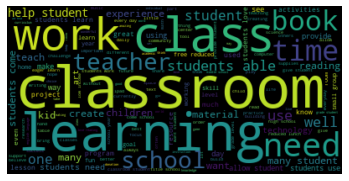

In [496]:
index = np.where(y_pred==0)[0] #stores the index of all the points belonging to cluster 2

# text stores all the essay text present in these indices
text =""
for i in index:
    text += X['clean_essay'][i]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

This cluster divides essays related to teaching

<h4> Cluster -1

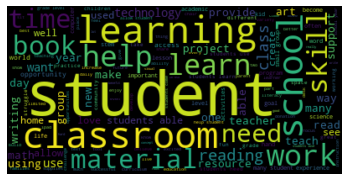

In [497]:
index = np.where(y_pred==-1)[0] #stores the index of all the points belonging to cluster 2

# text stores all the essay text present in these indices
text =""
for i in index:
    text += X['clean_essay'][i]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

This cluster contains essay which invloves material,support, work, resources for students

<h1>3. Conclusions</h1>
<br> Please write down few lines of your observations on this assignment.

1. Here we work with Bow features along with all other categorical and numerical feeatures
2. Three types of clustering were done-
   1. K-Means - k was found with a inertia vs k plot (where k is no. of clusters)
   2. Agglomerative - no. of clusters was decided after plotting the dendogram
   3. DBSCAN - eps was found out after finding the nearest neighbors for every point and then plotting the distances.
3. Word cloud were made for each cluste checking out which cluster contains what.